In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import sklearn.tree as tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
NBA = pd.read_csv("hf://datasets/suzyanil/nba-data/nba_games_stats.csv")
NBA.to_csv("NBA_dataset.csv", index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
NBA['WINorLOSS'] = LabelEncoder().fit_transform(NBA['WINorLOSS'])

In [4]:
X = NBA.drop(columns=['WINorLOSS', 'Date', 'Team', 'Opponent', 'Game', 'Unnamed: 0', 'Home','TeamPoints','OpponentPoints'])
y = NBA['WINorLOSS']
features = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
NBA_RF = RandomForestClassifier(random_state=42, n_estimators=100)
NBA_RF.fit(X, y)

if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])

explainer = shap.Explainer(NBA_RF, X)

In [6]:
shap_values = explainer(X_test,check_additivity=False)

100%|===================| 3917/3936 [03:18<00:00]       

In [7]:
exp = shap.Explanation(shap_values[:,:,1], shap_values.base_values[:,1], X, feature_names=features)

In [8]:
exp[10]

.values =
array([-0.01733795,  0.00756471, -0.04397984,  0.00654984,  0.0044769 ,
        0.00057338, -0.02997302, -0.0075973 , -0.00881583,  0.00245304,
        0.02862853, -0.00313661, -0.02012211,  0.00790915,  0.03064533,
        0.03558789, -0.02799732,  0.00274485,  0.08822652,  0.03143126,
        0.00479811,  0.0801403 ,  0.06515935,  0.03448668,  0.01449997,
        0.00386546, -0.02762061,  0.0378096 , -0.00014234, -0.00189248,
       -0.02420683, -0.01372861])

.base_values =
0.5490000000000006

.data =
array([38.   , 88.   ,  0.432, 10.   , 29.   ,  0.345, 12.   , 19.   ,
        0.632, 11.   , 46.   , 22.   ,  1.   ,  6.   , 10.   , 13.   ,
       40.   , 92.   ,  0.435,  5.   , 23.   ,  0.217, 11.   , 16.   ,
        0.688, 10.   , 51.   , 17.   ,  8.   ,  8.   ,  6.   , 17.   ])

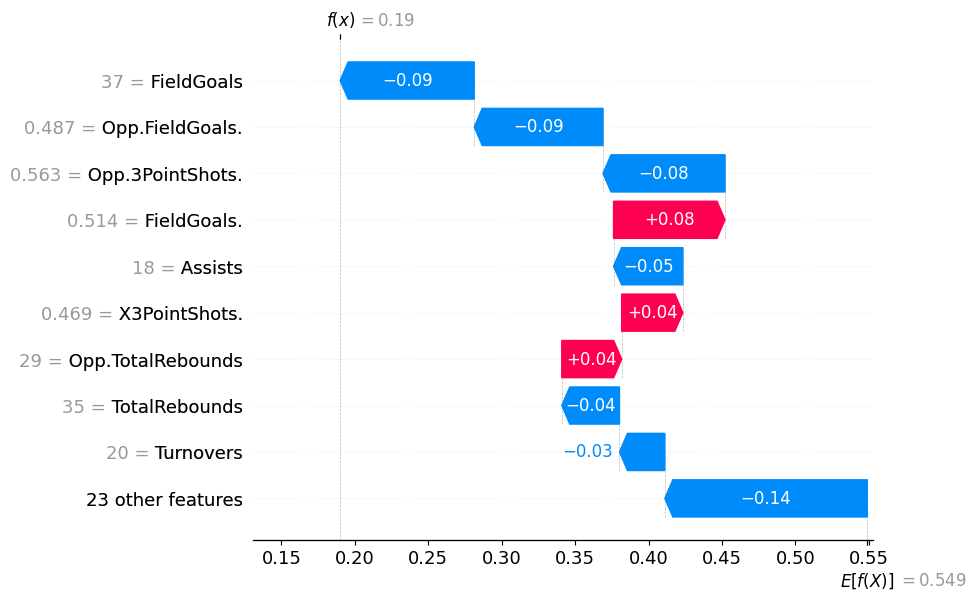

In [11]:
idx = 799
shap.plots.waterfall(exp[idx])

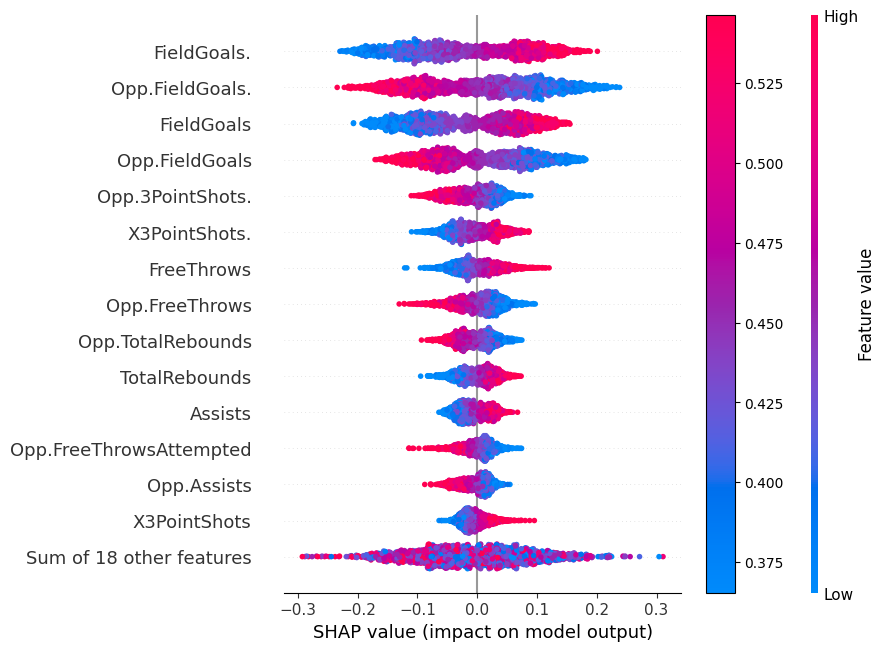

In [ ]:
plt.figure(figsize=(12, 8))
shap.plots.beeswarm(exp, max_display=15, show=False)
plt.savefig("beeswarm.png", dpi=72)
plt.colorbar()
plt.show()